### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

### Import data

In [2]:
data = pd.read_csv('data\house_prices.csv')
data

,Bedrooms,Bathrooms,Location,Price
0,3,3.0,"Parklands, Westlands",28000000
1,1,1.0,Lavington,6500000
2,0,1.0,"Ngara, Parklands, Westlands",2700000
3,2,1.0,Ngong Road,5400000
4,1,1.0,Ngong Road,4000000
...,...,...,...,...
1123,3,1.0,"Riverside, Westlands",27000000
1124,1,4.0,"Kagundo Road, Kileleshwa",4100000
1125,3,4.0,"Riverside, Westlands",38000000
1126,3,1.0,Kileleshwa,19500000


In [4]:
location_data = pd.read_csv('data\locations.csv')
location_data

,Location
0,Athi River
1,Athiriver
2,Baba Dogo
3,Dagoretti
4,Donholm
...,...
88,Wangige
89,Westlands
90,Weteithie
91,Woodland


### Data checks to perform
* Check missing values
* Check duplicate values
* Check data types
* Check number of unique values per column
* Check statistics of dataset
* Check for outliers

In [5]:
data.describe(include='all')

,Bedrooms,Bathrooms,Location,Price
count,1128.000000,1106.000000,1128,1.128000e+03
unique,NaN,NaN,273,NaN
top,NaN,NaN,"Westlands Area, Westlands",NaN
freq,NaN,NaN,114,NaN
mean,2.321809,2.559675,NaN,3.670982e+07
std,1.152977,1.332694,NaN,4.528857e+08
min,0.000000,1.000000,NaN,0.000000e+00
25%,2.000000,1.250000,NaN,7.800000e+06
50%,2.000000,2.000000,NaN,1.251639e+07
75%,3.000000,3.000000,NaN,2.120000e+07


In [6]:
data.describe()

,Bedrooms,Bathrooms,Price
count,1128.000000,1106.000000,1.128000e+03
mean,2.321809,2.559675,3.670982e+07
std,1.152977,1.332694,4.528857e+08
min,0.000000,1.000000,0.000000e+00
25%,2.000000,1.250000,7.800000e+06
50%,2.000000,2.000000,1.251639e+07
75%,3.000000,3.000000,2.120000e+07
max,10.000000,10.000000,1.350000e+10


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bedrooms   1128 non-null   int64  
 1   Bathrooms  1106 non-null   float64
 2   Location   1128 non-null   object 
 3   Price      1128 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 35.4+ KB


#### Check missing values

In [8]:
data.isna().sum()

Bedrooms      0
Bathrooms    22
Location      0
Price         0
dtype: int64

In [9]:
data.duplicated().sum()

223

In [10]:
dups = data[data.duplicated()]
dups

,Bedrooms,Bathrooms,Location,Price
16,3,3.0,"Westlands Area, Westlands",11800000
23,1,1.0,"Westlands Area, Westlands",6000000
29,4,5.0,Kileleshwa,20000000
32,3,3.0,Kileleshwa,11000000
35,2,1.0,Kileleshwa,7000000
...,...,...,...,...
1092,2,2.0,"Nyeri Road, Kileleshwa",9000000
1097,2,1.0,Kileleshwa,7000000
1100,2,2.0,"Riverside, Westlands",25000000
1104,3,3.0,"Nyeri Road, Kileleshwa",16500000


In [11]:
undup = data.drop_duplicates()
undup

,Bedrooms,Bathrooms,Location,Price
0,3,3.0,"Parklands, Westlands",28000000
1,1,1.0,Lavington,6500000
2,0,1.0,"Ngara, Parklands, Westlands",2700000
3,2,1.0,Ngong Road,5400000
4,1,1.0,Ngong Road,4000000
...,...,...,...,...
1123,3,1.0,"Riverside, Westlands",27000000
1124,1,4.0,"Kagundo Road, Kileleshwa",4100000
1125,3,4.0,"Riverside, Westlands",38000000
1126,3,1.0,Kileleshwa,19500000


In [12]:
undup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 905 entries, 0 to 1127
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bedrooms   905 non-null    int64  
 1   Bathrooms  883 non-null    float64
 2   Location   905 non-null    object 
 3   Price      905 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 35.4+ KB


In [13]:
unmiss = undup.dropna()

In [14]:
unmiss

,Bedrooms,Bathrooms,Location,Price
0,3,3.0,"Parklands, Westlands",28000000
1,1,1.0,Lavington,6500000
2,0,1.0,"Ngara, Parklands, Westlands",2700000
3,2,1.0,Ngong Road,5400000
4,1,1.0,Ngong Road,4000000
...,...,...,...,...
1122,2,3.0,"Wood Avenue, Kilimani",12000000
1123,3,1.0,"Riverside, Westlands",27000000
1124,1,4.0,"Kagundo Road, Kileleshwa",4100000
1125,3,4.0,"Riverside, Westlands",38000000


In [15]:
def location_fill(df1, df2, col_a, col_b):
    location_list = list(df2[col_b])
    list_location = [
        next((item1 for item1 in location_list if item1 in item2), item2) 
        for item2 in list(df1[col_a])
    ]
    df3 = df1.copy()
    df3[col_b] = list_location
    return df3

In [16]:
my_data = location_fill(unmiss, location_data, 'Location', 'Location')

In [17]:
my_data

,Bedrooms,Bathrooms,Location,Price
0,3,3.0,Parklands,28000000
1,1,1.0,Lavington,6500000
2,0,1.0,Ngara,2700000
3,2,1.0,Ngong Road,5400000
4,1,1.0,Ngong Road,4000000
...,...,...,...,...
1122,2,3.0,Kilimani,12000000
1123,3,1.0,Riverside,27000000
1124,1,4.0,Kileleshwa,4100000
1125,3,4.0,Riverside,38000000


In [18]:
my_data['Location'].unique()

array(['Parklands', 'Lavington', 'Ngara', 'Ngong Road', 'Mombasa Road',
       'Athiriver', 'Riverside', 'Westlands', 'Kileleshwa', 'Kilimani',
       'Upper Hill', 'Lower Kabete', 'Karen', 'Dagoretti',
       'Spring Valley', 'Thika', 'Roysambu', 'South C', 'Embakasi',
       'Valley Arcade', 'Muthaiga', 'Imara Daima', 'Dennis Pritt',
       'Nairobi West', 'Kitisuru', 'Naivasha Road', 'Kikuyu', 'Loresho',
       'Pangani', 'Juja', 'Kiambu', 'Uthiru', 'Kasarani', 'Riara',
       'Ruaka', 'South B', 'Madaraka', 'Ruaraka', 'State House'],
      dtype=object)

In [19]:
my_data['Location'].value_counts()

Westlands        275
Kilimani         161
Kileleshwa       149
Lavington         91
Riverside         48
Parklands         26
Mombasa Road      20
Roysambu          12
Thika             12
Lower Kabete      10
Spring Valley      9
Ngong Road         9
Kitisuru           7
Dagoretti          7
Embakasi           5
Kiambu             4
Riara              4
Ngara              3
Upper Hill         3
Juja               2
Loresho            2
Naivasha Road      2
Athiriver          2
Imara Daima        2
South C            2
Kasarani           2
Muthaiga           2
South B            1
Madaraka           1
Ruaka              1
Ruaraka            1
Valley Arcade      1
Uthiru             1
Pangani            1
Kikuyu             1
Nairobi West       1
Dennis Pritt       1
Karen              1
State House        1
Name: Location, dtype: int64

### Check for outliers in the columns

#### Bathroom outliers

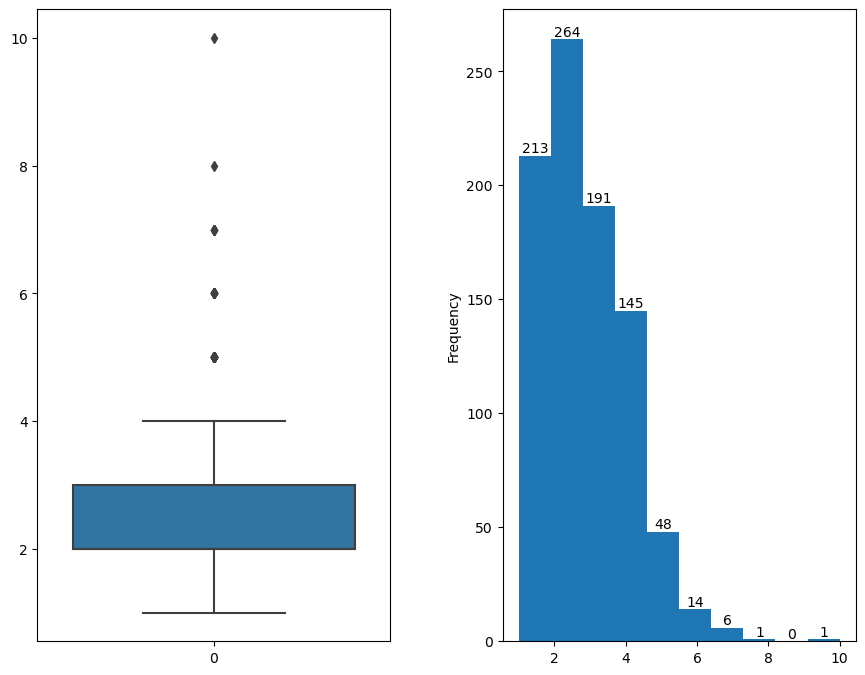

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,8))
fig.tight_layout(pad=5)

# plt.figure(figsize = (10,8))
ax1 = sns.boxplot(my_data['Bathrooms'], ax= ax1)

ax2 = my_data['Bathrooms'].plot(kind='hist',ax=ax2)
for container in ax2.containers:
    ax2.bar_label(container,label_type='edge', rotation=0, color='black')#,fmt='%d')

In [21]:
my_data['Bathrooms'].value_counts()

2.0     264
1.0     213
3.0     191
4.0     145
5.0      48
6.0      14
7.0       6
10.0      1
8.0       1
Name: Bathrooms, dtype: int64

#### Inter-quartile range (IQR) for bathrooms 

In [22]:
q1_bath = np.percentile(my_data['Bathrooms'], 25)
q2_bath = np.percentile(my_data['Bathrooms'], 50)
q3_bath = np.percentile(my_data['Bathrooms'], 75)
iqr_bath = q3_bath - q1_bath
lower_bath_limit = q1_bath - (1.5*iqr_bath)
upper_bath_limit = q3_bath + (1.5*iqr_bath)
print(f'The lower limit is {lower_bath_limit}')
print(f'The upper limit is {upper_bath_limit}')
print(f'The IQR is {iqr_bath}')


The lower limit is 0.5
The upper limit is 4.5
The IQR is 1.0


#### Bedroom outliers

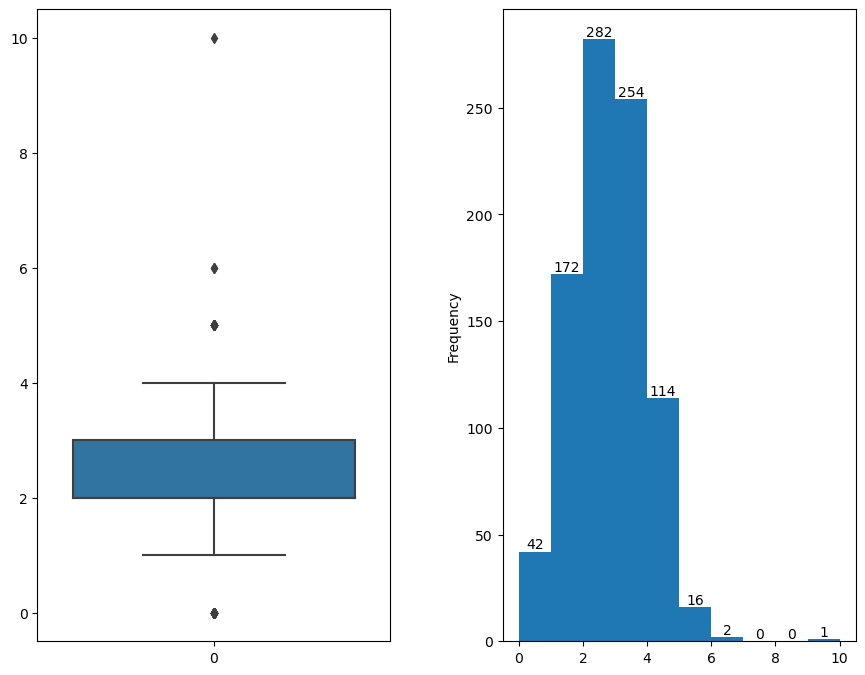

In [23]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,8))
fig.tight_layout(pad=5)

# plt.figure(figsize = (10,8))
ax1 = sns.boxplot(my_data['Bedrooms'], ax= ax1)

ax2 = my_data['Bedrooms'].plot(kind='hist',ax=ax2)
for container in ax2.containers:
    ax2.bar_label(container,label_type='edge', rotation=0, color='black')#,fmt='%d')

In [24]:
my_data['Bedrooms'].value_counts()

2     282
3     254
1     172
4     114
0      42
5      16
6       2
10      1
Name: Bedrooms, dtype: int64

#### Inter-quartile range (IQR) for bedrooms 

In [50]:
q1_bed = np.percentile(my_data['Bedrooms'], 25)
q2_bed = np.percentile(my_data['Bedrooms'], 50)
q3_bed = np.percentile(my_data['Bedrooms'], 75)
iqr_bed = q3_bed - q1_bed
lower_bed_limit = q1_bed - (1.5*iqr_bed)
upper_bed_limit = q3_bed + (1.5*iqr_bed)
print(f'The lower limit is {lower_bed_limit}')
print(f'The upper limit is {upper_bed_limit}')
print(f'The IQR is {iqr_bed}')

The lower limit is 0.5
The upper limit is 4.5
The IQR is 1.0


#### Price Outliers 

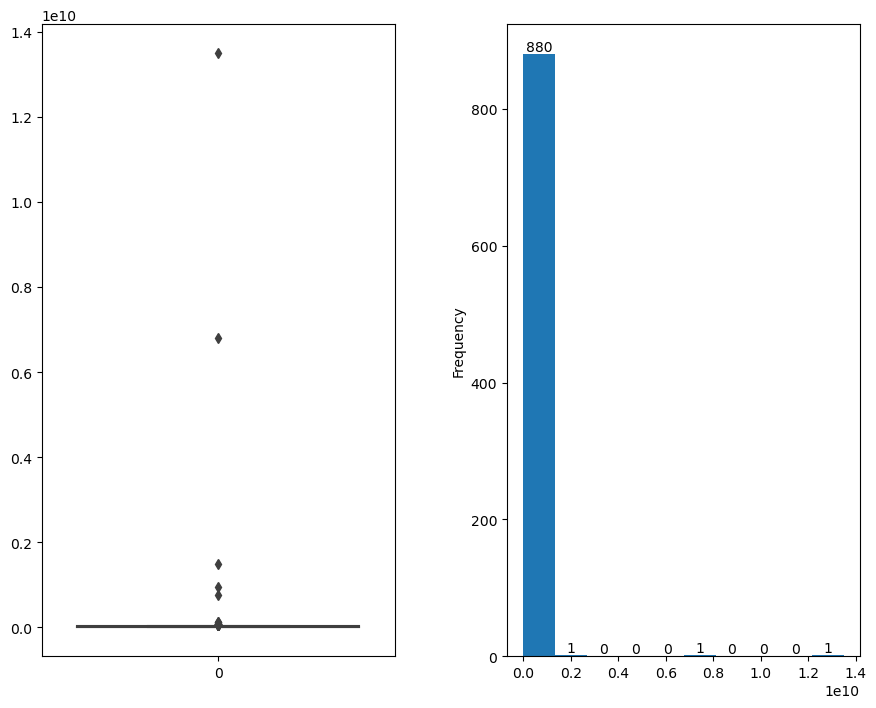

In [26]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,8))
fig.tight_layout(pad=5)

# plt.figure(figsize = (10,8))
ax1 = sns.boxplot(my_data['Price'], ax= ax1)

ax2 = my_data['Price'].plot(kind='hist',ax=ax2)
for container in ax2.containers:
    ax2.bar_label(container,label_type='edge', rotation=0, color='black')#,fmt='%d')

#### Inter-quartile range (IQR) for bathrooms 

In [27]:
q1_price = np.percentile(my_data['Price'], 25)
q2_price = np.percentile(my_data['Price'], 50)
q3_price = np.percentile(my_data['Price'], 75)
iqr_price = q3_price - q1_price
lower_price_limit = q1_price - (1.5*iqr_price)
upper_price_limit = q3_price + (1.5*iqr_price)
print(f'The lower limit is {lower_price_limit}')
print(f'The upper limit is {upper_price_limit}')
print(f'The IQR is {iqr_price}')

The lower limit is -13000000.0
The upper limit is 43000000.0
The IQR is 14000000.0


In [28]:
q1_price = np.percentile(my_data['Price'], 25)
q2_price = np.percentile(my_data['Price'], 50)
q3_price = np.percentile(my_data['Price'], 75)
iqr_price = q3_price - q1_price
lower_price_limit_new = q1_price - (3*iqr_price)
upper_price_limit_new = q3_price + (3*iqr_price)
print(f'The lower limit is {lower_price_limit_new}')
print(f'The upper limit is {upper_price_limit_new}')
print(f'The IQR is {iqr_price}')

The lower limit is -34000000.0
The upper limit is 64000000.0
The IQR is 14000000.0


### Remove outliers

In [29]:
outlier_price = my_data[my_data['Price']>upper_price_limit_new]
outlier_price

,Bedrooms,Bathrooms,Location,Price
235,2,2.0,Lower Kabete,6800000000
344,4,5.0,Westlands,84000000
346,10,10.0,Kileleshwa,750000000
398,4,4.0,Westlands,76000000
521,4,4.0,Lavington,130000000
638,3,3.0,Riverside,950000000
710,4,4.0,Loresho,87500000
711,4,4.0,Loresho,66000000
873,4,5.0,Muthaiga,75000000
880,2,2.0,Riverside,13500000000


In [51]:
new_data_1 = my_data.drop(my_data[my_data['Price']>upper_price_limit_new].index)
new_data_1

,Bedrooms,Bathrooms,Location,Price
0,3,3.0,Parklands,28000000
1,1,1.0,Lavington,6500000
2,0,1.0,Ngara,2700000
3,2,1.0,Ngong Road,5400000
4,1,1.0,Ngong Road,4000000
...,...,...,...,...
1122,2,3.0,Kilimani,12000000
1123,3,1.0,Riverside,27000000
1124,1,4.0,Kileleshwa,4100000
1125,3,4.0,Riverside,38000000


In [31]:
outlier_bed = new_data_1[new_data_1['Bedrooms']>math.ceil(upper_bed_limit)]
outlier_bed

,Bedrooms,Bathrooms,Location,Price
577,6,7.0,Lavington,33500000


In [32]:
new_data_2 = new_data_1.drop(outlier_bed.index)
new_data_2

,Bedrooms,Bathrooms,Location,Price
0,3,3.0,Parklands,28000000
1,1,1.0,Lavington,6500000
2,0,1.0,Ngara,2700000
3,2,1.0,Ngong Road,5400000
4,1,1.0,Ngong Road,4000000
...,...,...,...,...
1122,2,3.0,Kilimani,12000000
1123,3,1.0,Riverside,27000000
1124,1,4.0,Kileleshwa,4100000
1125,3,4.0,Riverside,38000000


In [33]:
outlier_bath = new_data_2[new_data_2['Bathrooms']>math.ceil(upper_bath_limit)]
outlier_bath

,Bedrooms,Bathrooms,Location,Price
27,5,6.0,Kilimani,35000000
253,5,7.0,Kileleshwa,41000000
364,5,6.0,Lavington,33000000
365,5,6.0,Kilimani,33000000
376,4,6.0,Kileleshwa,28000000
535,4,6.0,Spring Valley,28000000
578,5,7.0,Kilimani,33500000
579,5,6.0,Lavington,26300000
580,4,6.0,Kilimani,26300000
618,4,6.0,Spring Valley,31000000


In [34]:
new_data_3 = new_data_2.drop(outlier_bath.index)
new_data_3

,Bedrooms,Bathrooms,Location,Price
0,3,3.0,Parklands,28000000
1,1,1.0,Lavington,6500000
2,0,1.0,Ngara,2700000
3,2,1.0,Ngong Road,5400000
4,1,1.0,Ngong Road,4000000
...,...,...,...,...
1122,2,3.0,Kilimani,12000000
1123,3,1.0,Riverside,27000000
1124,1,4.0,Kileleshwa,4100000
1125,3,4.0,Riverside,38000000


### Visualisations

Text(0.5, 1.0, 'Price Distribution of Apartments')

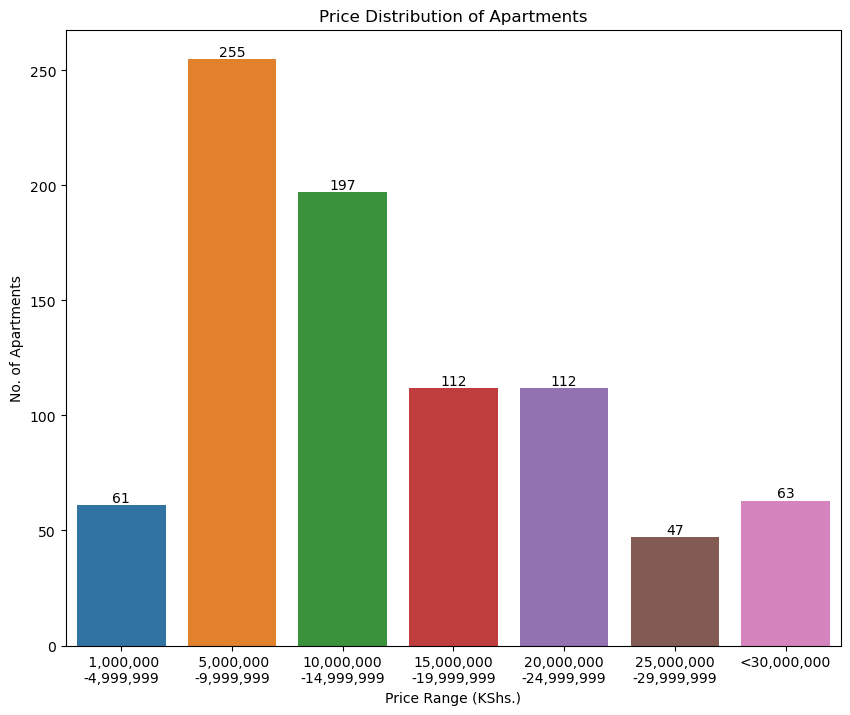

In [36]:
new_data_3.loc[new_data_3['Price']>=1000000,'Price_range'] = ' 1,000,000\n-4,999,999'
new_data_3.loc[new_data_3['Price']>5000000,'Price_range'] = ' 5,000,000\n-9,999,999'
new_data_3.loc[new_data_3['Price']>10000000,'Price_range'] = '10,000,000\n-14,999,999'
new_data_3.loc[new_data_3['Price']>15000000,'Price_range'] = '15,000,000\n-19,999,999'
new_data_3.loc[new_data_3['Price']>20000000,'Price_range'] = '20,000,000\n-24,999,999'
new_data_3.loc[new_data_3['Price']>25000000,'Price_range'] = '25,000,000\n-29,999,999'
new_data_3.loc[new_data_3['Price']>30000000,'Price_range'] = '<30,000,000'

price_groups = new_data_3.groupby(by='Price_range')['Price'].count()

plt.figure(figsize = (10,8))

ax = sns.barplot(x=price_groups.index, y= price_groups.values)#, y = 'Customer ID')#, ax=ax1)
for container in ax.containers:
    ax.bar_label(container,label_type='edge', rotation=0, color='black')

ax.set_ylabel('No. of Apartments')
ax.set_xlabel('Price Range (KShs.)')


plt.title('Price Distribution of Apartments')

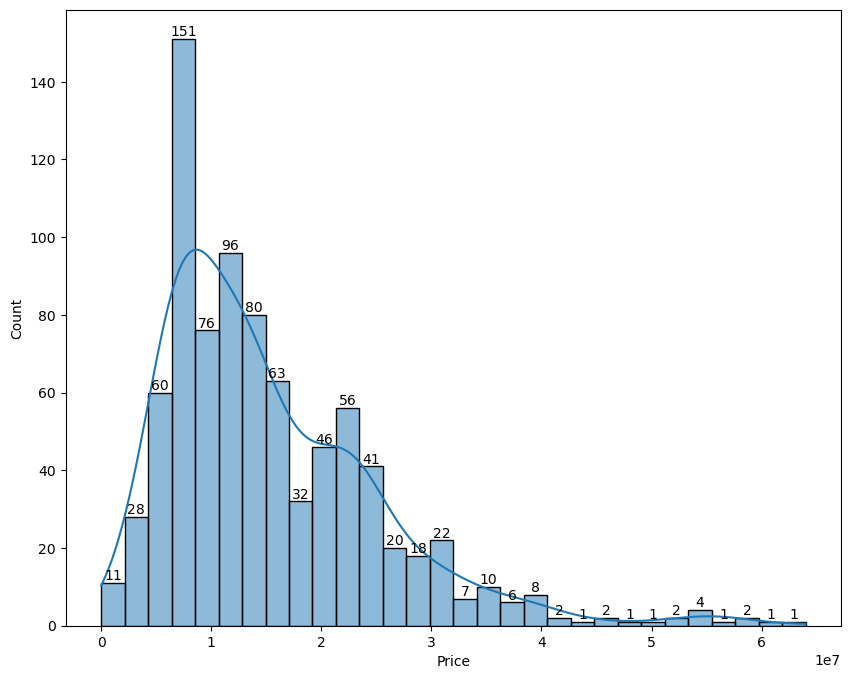

In [37]:
plt.figure(figsize = (10,8))

ax = sns.histplot(data=new_data_3, x='Price',kde=True,bins=30)# y= price_groups.values)#, y = 'Customer ID')#, ax=ax1)
for container in ax.containers:
    ax.bar_label(container,label_type='edge', rotation=0, color='black')

# ax.set_ylabel('No. of Apartments')
# ax.set_xlabel('Price Range (KShs.)')

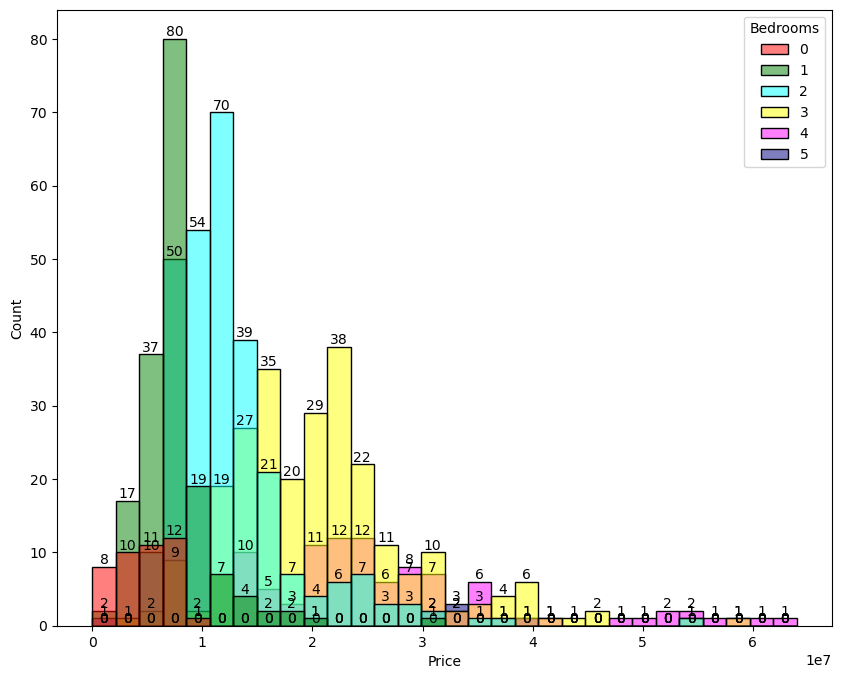

In [38]:
plt.figure(figsize = (10,8))

ax = sns.histplot(data=new_data_3, x='Price',bins=30, hue='Bedrooms', palette={0:'red', 1:'green', 2:'cyan', 
                                                                               3 :'yellow', 4:'magenta', 5:'navy'})
for container in ax.containers:
    ax.bar_label(container,label_type='edge', rotation=0, color='black')

In [39]:
new_data_3

,Bedrooms,Bathrooms,Location,Price,Price_range
0,3,3.0,Parklands,28000000,"25,000,000\n-29,999,999"
1,1,1.0,Lavington,6500000,"5,000,000\n-9,999,999"
2,0,1.0,Ngara,2700000,"1,000,000\n-4,999,999"
3,2,1.0,Ngong Road,5400000,"5,000,000\n-9,999,999"
4,1,1.0,Ngong Road,4000000,"1,000,000\n-4,999,999"
...,...,...,...,...,...
1122,2,3.0,Kilimani,12000000,"10,000,000\n-14,999,999"
1123,3,1.0,Riverside,27000000,"25,000,000\n-29,999,999"
1124,1,4.0,Kileleshwa,4100000,"1,000,000\n-4,999,999"
1125,3,4.0,Riverside,38000000,"<30,000,000"


In [40]:
new_data_3.reset_index(drop=True)

,Bedrooms,Bathrooms,Location,Price,Price_range
0,3,3.0,Parklands,28000000,"25,000,000\n-29,999,999"
1,1,1.0,Lavington,6500000,"5,000,000\n-9,999,999"
2,0,1.0,Ngara,2700000,"1,000,000\n-4,999,999"
3,2,1.0,Ngong Road,5400000,"5,000,000\n-9,999,999"
4,1,1.0,Ngong Road,4000000,"1,000,000\n-4,999,999"
...,...,...,...,...,...
844,2,3.0,Kilimani,12000000,"10,000,000\n-14,999,999"
845,3,1.0,Riverside,27000000,"25,000,000\n-29,999,999"
846,1,4.0,Kileleshwa,4100000,"1,000,000\n-4,999,999"
847,3,4.0,Riverside,38000000,"<30,000,000"


In [41]:
final_data = new_data_3.drop('Price_range', axis=1)
final_data

,Bedrooms,Bathrooms,Location,Price
0,3,3.0,Parklands,28000000
1,1,1.0,Lavington,6500000
2,0,1.0,Ngara,2700000
3,2,1.0,Ngong Road,5400000
4,1,1.0,Ngong Road,4000000
...,...,...,...,...
1122,2,3.0,Kilimani,12000000
1123,3,1.0,Riverside,27000000
1124,1,4.0,Kileleshwa,4100000
1125,3,4.0,Riverside,38000000


In [42]:
final_data.nunique()

Bedrooms       6
Bathrooms      5
Location      38
Price        231
dtype: int64

In [43]:
print('Unique locations: ',end='')
print(final_data['Location'].unique())

Unique locations: ['Parklands' 'Lavington' 'Ngara' 'Ngong Road' 'Mombasa Road' 'Athiriver'
 'Riverside' 'Westlands' 'Kileleshwa' 'Kilimani' 'Upper Hill'
 'Lower Kabete' 'Karen' 'Dagoretti' 'Spring Valley' 'Thika' 'Roysambu'
 'South C' 'Embakasi' 'Valley Arcade' 'Muthaiga' 'Imara Daima'
 'Dennis Pritt' 'Nairobi West' 'Kitisuru' 'Naivasha Road' 'Kikuyu'
 'Pangani' 'Juja' 'Kiambu' 'Uthiru' 'Kasarani' 'Riara' 'Ruaka' 'South B'
 'Madaraka' 'Ruaraka' 'State House']


In [44]:
print('Unique bathrooms: ',end='')
print(final_data['Bathrooms'].unique())

Unique bathrooms: [3. 1. 2. 4. 5.]


In [45]:
print('Unique bedrooms: ',end='')
print(final_data['Bedrooms'].unique())

Unique bedrooms: [3 1 0 2 4 5]


In [46]:
print('Unique bedrooms: ',end='')
print(final_data['Bedrooms'].value_counts())

Unique bedrooms: 2    279
3    253
1    172
4     96
0     42
5      7
Name: Bedrooms, dtype: int64


In [47]:
numerical_features = [feature for feature in final_data.columns if final_data[feature].dtype != 'O']
categorical_features = [feature for feature in final_data.columns if final_data[feature].dtype == 'O']
print(f'We have {len(numerical_features)} numerical features i.e. {numerical_features}')
print(f'We have {len(categorical_features)} categorical features i.e. {categorical_features}')    

We have 3 numerical features i.e. ['Bedrooms', 'Bathrooms', 'Price']
We have 1 categorical features i.e. ['Location']


In [48]:
final_data.to_csv('data\housing_data.csv', index=False)

In [49]:
final_data.describe()

,Bedrooms,Bathrooms,Price
count,849.000000,849.000000,8.490000e+02
mean,2.247350,2.462898,1.538661e+07
std,1.079426,1.185149,9.919895e+06
min,0.000000,1.000000,0.000000e+00
25%,1.000000,1.000000,7.900000e+06
50%,2.000000,2.000000,1.280000e+07
75%,3.000000,3.000000,2.100000e+07
max,5.000000,5.000000,6.400000e+07
